## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [2]:
#create DataFrame
import pandas as pd

df=pd.read_csv('train.csv', sep=',')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#check number of rows and columns
df.shape

(891, 12)

In [4]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#drop cabin and ticket columns
df.drop(columns=['Ticket','Cabin'],inplace=True)

In [6]:
#view data stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


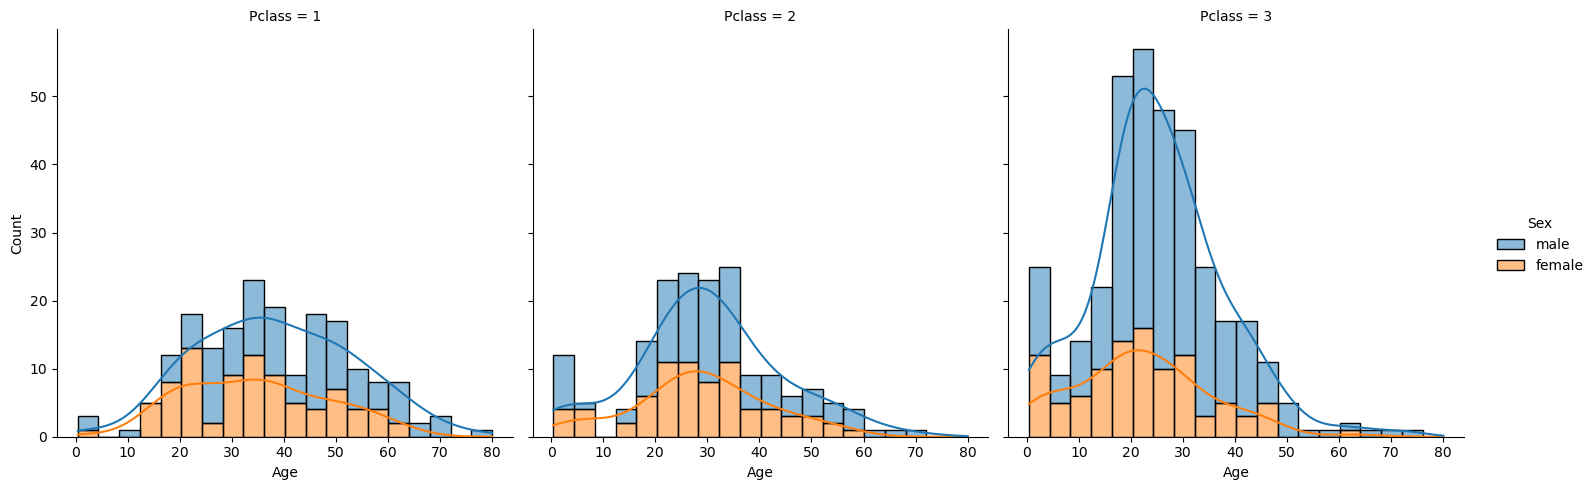

In [7]:
#graph age to check distribution by class and sex
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(
    data=df,
    x='Age',
    hue='Sex',
    col='Pclass',
    multiple='stack',
    bins=20,
    kde=True)

In [8]:
#fill NAs with median age by class and sex
df['Age']=df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [9]:
#check missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [10]:
#add a column for age groups
df['age_groups']=(pd.cut(df['Age'],
                         bins=[0,19,30,40,50,60,90],
                         right=False,
                         labels=['0-18','19-29','30s','40s','50s','60+']))

In [11]:
#survivors by age group
survivors_age_group=pd.crosstab(index=df['age_groups'], columns=df['Survived'], values=df['PassengerId'], aggfunc='count').round(1)

survivors_age_group

Survived,0,1
age_groups,,
0-18,69,70
19-29,261,122
30s,101,84
40s,71,39
50s,28,20
60+,19,7


In [12]:
#percentage of each age group that survived
survivors_age_perc=(survivors_age_group.div(survivors_age_group.sum(axis=1),axis=0)*100).round(2)
survivors_age_perc

Survived,0,1
age_groups,,
0-18,49.64,50.36
19-29,68.15,31.85
30s,54.59,45.41
40s,64.55,35.45
50s,58.33,41.67
60+,73.08,26.92


In [13]:
#survivors by age group & class
survivors_age_group2=pd.crosstab(index=df['age_groups'], columns=[df['Pclass'],df['Survived']], values=df['PassengerId'], aggfunc='count').round(1)

survivors_age_group2

Pclass       1       2        3    
Survived     0   1   0   1    0   1
age_groups                         
0-18         2  14   6  23   61  33
19-29       12  27  34  27  215  68
30s         11  48  36  21   54  15
40s         31  27   8  10   32   2
50s         12  15  10   5    6   0
60+         12   5   3   1    4   1

In [14]:
#add column for parents + children
import numpy as np
df['parent_child']=np.where(df['Parch']>0,'Yes','No')

In [15]:
#check parent and child survivors - almost the same number of parents/children in both survivor and non-survivor categories
df.groupby(['Survived','parent_child'])['PassengerId'].count()

Survived  parent_child
0         No              445
          Yes             104
1         No              233
          Yes             109
Name: PassengerId, dtype: int64

In [16]:
#check survivors by port of embarkation - doesn't appear to be a relationship
df.groupby(['Survived','Embarked'])['PassengerId'].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: PassengerId, dtype: int64

In [17]:
#check sibling spouse column - doesn't appear to be a relationship
df['sib_spouse']=np.where(df['SibSp']>0,'Yes','No')
df.groupby(['Survived','sib_spouse'])['PassengerId'].count()

Survived  sib_spouse
0         No            398
          Yes           151
1         No            210
          Yes           132
Name: PassengerId, dtype: int64

In [18]:
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [19]:
#check survivors by class + median fare - survivors had a higher median fare, especially 1st & 2nd class
df.groupby(['Survived','Pclass']).agg(Median_Fare=('Fare','median'),Count=('PassengerId','count'))

Median_Fare  Count
Survived Pclass                    
0        1           44.7500     80
         2           13.0000     97
         3            8.0500    372
1        1           77.9583    136
         2           21.0000     87
         3            8.5167    119

In [20]:
#survival rate by class
survivors_class1=(df.groupby(['Survived','Pclass'])['PassengerId'].count()
              .groupby(level=0)
              .apply(lambda x :x/x.sum()*100).round(2)
              .rename('Survival Rate'))

survivors_class1

Survived  Survived  Pclass
0         0         1         14.57
                    2         17.67
                    3         67.76
1         1         1         39.77
                    2         25.44
                    3         34.80
Name: Survival Rate, dtype: float64

In [21]:
#percentage of survivors by class - 1st and 2nd class passengers had the highest chance of survival
survivors_class2=pd.crosstab(index=df['Pclass'], columns=df['Survived'],values=df['PassengerId'], aggfunc='count').round(1)

survivors_class2_perc=(survivors_class2.div(survivors_class2.sum(axis=1),axis=0)*100).round(2)
survivors_class2_perc

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


In [22]:
#total male and females aboard
df.groupby('Sex')['PassengerId'].count() 

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [23]:
#percentage of females that survived vs percentage of males that survived
survivors_sex2=pd.crosstab(index=df['Sex'], columns=df['Survived'],values=df['PassengerId'], aggfunc='count').round(1)

survivors_sex2_perc=(survivors_sex2.div(survivors_sex2.sum(axis=1),axis=0)*100).round(2)
survivors_sex2_perc

Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'age_groups', 'parent_child',
       'sib_spouse'],
      dtype='object')

Question 1. (4 points)

The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? (2 points)
The detailed explanation of the logic of the analysis (2 points)

In [25]:
# 1st and 2nd class passengers had the highest chance of survival: 63% of 1st class passengers survived and 47% of 2nd class passengers survived.
#Compared to 3rd class which only had a survival rate of 24%.
# Survivors had a higher median fare, especially 1st &  2nd class compared to the same class of non-survivors.
# The 0-18 age group had the highest percentage of survivors (50%) followed by passengers in their 30s (45%).
# 74% of female passengers survived and only 19% of male passengers survived.
#Overall, you had the best chance of surviving if you were a female especially in 1st or 2nd class and under 19 years of age or in your 30s.

Question 2. (3 points)

What other attributes did you use for the analysis? Explain how you used them and why you decided to use them.
Provide a complete list of all attributes used.

In [26]:
# 'PassengerId'- I only used this attribute when I needed to use the count function.
# 'Survived'- Used to group data so I could compare survivors vs non-survivors throughout my analysis. 
# 'Pclass'- Used for grouping with several other attributes to help determine the importance of class to survival rates, 
#a variable in my graphs, and was included in my median calculation to fill NAs in the ‘age’ column.  
# 'Sex' -Used for grouping with several other attributes, a variable in my graphs, and was included in my median calculation
#to fill NAs in the ‘age’ column. 
# 'Age' - Used in graphs to help detemine distribution and to create age groups. 
# 'Fare'- Used in a groupby to determine if survivors paid a higher fare.
# 'age_groups' - Used in groups/crosstabs to help determine which age group is most likely to survive.

Question 3. (3 points)

Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

In [27]:
#New attributes created:

# 'age_groups' - to categorize the age column so I could see if there was a specific age group that was most likely to survive,
#I thought this would be more insightful than just a median age.
# 'parent_child' - parent-child(yes/no)- to help determine if there was a relationship to the survivor attribute, I didn't end up using this because
#because there wasnt a strong relationship.
# 'sib_spouse' - sibling_spouse(yes/no) - to help determine if there was a relationship to the survivor attribute, I didn't end up using this because
#because there wasnt a strong relationship.

#Excluded attributes:

#The following attributes were excluded because they didn't show a strong enough relationship with the 'Survivors' attribute: 'Parch', 'SibSp'.
#The following attributes were excluded because the data was random and not relevant: 'Name', 'Ticket'.
#'Cabin' was excluded because there was a lot of data missing.

Question 4. (5 points)

How did you treat missing values for those attributes that you included in the analysis (for example, age attribute)? Provide a detailed explanation in the comments.

In [28]:
#The only attribute with missing values that I used was 'Age'. 
#More than 15% of the values were missing which is enough to skew the analysis if I chose to just remove those rows.
#I put the data into graphs and categorized by 'Sex' and 'Class'.
#There was a range in age for each graph, however each graph had a peak where ages were concentrated around a specific age group.
#I decided to fill the missing age values with the median age.